# Movie Lines #

In [1]:
import pandas as pd

movie_lines_features = ["LineID", "Character", "Movie", "Name", "Line"]
movie_lines = pd.read_csv("movie_lines.txt", sep = "\+\+\+\$\+\+\+", engine = "python", index_col = False, names = movie_lines_features)
movie_lines.head()

,LineID,Character,Movie,Name,Line
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


# Movie Characters #


In [2]:
movie_characters_features = ["Character", "Name", "Movie", "Title", "Gender",'Position']
movie_characters = pd.read_csv("movie_characters_metadata.txt", sep = "\+\+\+\$\+\+\+", engine = "python", index_col = False, names = movie_characters_features)
movie_characters = movie_characters[['Character', 'Title', 'Gender']]
movie_characters.head()

,Character,Title,Gender
0,u0,10 things i hate about you,f
1,u1,10 things i hate about you,?
2,u2,10 things i hate about you,m
3,u3,10 things i hate about you,?
4,u4,10 things i hate about you,m


# Movie Data #

In [3]:
movie_metadata_features = ["Movie", "Title", "Year", "Rating", "Votes",'Genres']
movie_metadata = pd.read_csv("movie_titles_metadata.txt", sep = "\+\+\+\$\+\+\+", engine = "python", index_col = False, names = movie_metadata_features)
movie_metadata = movie_metadata[['Movie', 'Year', 'Rating', 'Genres']]
movie_metadata.head()

,Movie,Year,Rating,Genres
0,m0,1999,6.9,"['comedy', 'romance']"
1,m1,1992,6.2,"['adventure', 'biography', 'drama', 'history']"
2,m2,2001,6.1,"['action', 'crime', 'drama', 'thriller']"
3,m3,1968,8.4,"['adventure', 'mystery', 'sci-fi']"
4,m4,1982,6.9,"['action', 'comedy', 'crime', 'drama', 'thril..."


# Merging #

In [4]:
movie_lines.Character = movie_lines.Character.str.strip()

In [5]:
movie_characters.Character = movie_characters.Character.str.strip()

In [6]:
character_lines = movie_characters.merge(movie_lines, left_on='Character', right_on='Character')

In [7]:
character_lines.head()

,Character,Title,Gender,LineID,Movie,Name,Line
0,u0,10 things i hate about you,f,L1045,m0,BIANCA,They do not!
1,u0,10 things i hate about you,f,L985,m0,BIANCA,I hope so.
2,u0,10 things i hate about you,f,L925,m0,BIANCA,Let's go.
3,u0,10 things i hate about you,f,L872,m0,BIANCA,Okay -- you're gonna need to learn how to lie.
4,u0,10 things i hate about you,f,L870,m0,BIANCA,I'm kidding. You know how sometimes you just...


In [8]:
character_lines.Movie = character_lines.Movie.str.strip()

In [9]:
movie_metadata.Movie = movie_metadata.Movie.str.strip()

In [10]:
character_lines_metadata = character_lines.merge(movie_metadata, left_on='Movie', right_on='Movie')

In [11]:
character_lines_metadata.head()

,Character,Title,Gender,LineID,Movie,Name,Line,Year,Rating,Genres
0,u0,10 things i hate about you,f,L1045,m0,BIANCA,They do not!,1999,6.9,"['comedy', 'romance']"
1,u0,10 things i hate about you,f,L985,m0,BIANCA,I hope so.,1999,6.9,"['comedy', 'romance']"
2,u0,10 things i hate about you,f,L925,m0,BIANCA,Let's go.,1999,6.9,"['comedy', 'romance']"
3,u0,10 things i hate about you,f,L872,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,1999,6.9,"['comedy', 'romance']"
4,u0,10 things i hate about you,f,L870,m0,BIANCA,I'm kidding. You know how sometimes you just...,1999,6.9,"['comedy', 'romance']"


In [12]:
character_lines_metadata.sort_values(by='Year', ascending=True)

,Character,Title,Gender,LineID,Movie,Name,Line,Year,Rating,Genres
70542,u2078,metropolis,?,L379564,m134,TANNER,Describe program function.,1927,8.4,"['adventure', 'drama', 'sci-fi']"
70350,u2072,metropolis,?,L379413,m134,GENA,This is how you pick up women --,1927,8.4,"['adventure', 'drama', 'sci-fi']"
70351,u2072,metropolis,?,L379411,m134,GENA,That's a strange question. You a strange man?,1927,8.4,"['adventure', 'drama', 'sci-fi']"
70352,u2072,metropolis,?,L379409,m134,GENA,As long as it's not 'what's your sign?',1927,8.4,"['adventure', 'drama', 'sci-fi']"
70353,u2072,metropolis,?,L379402,m134,GENA,Take care? Where the hell are you going --,1927,8.4,"['adventure', 'drama', 'sci-fi']"
...,...,...,...,...,...,...,...,...,...,...
94412,u2784,simone,M,L507599,m181,VIKTOR,She said you were very beautiful.,2010,8.3,"['short', 'drama', 'horror', 'thriller']"
94411,u2784,simone,M,L507601,m181,VIKTOR,"Elaine, what are you doing tonight? Would you...",2010,8.3,"['short', 'drama', 'horror', 'thriller']"
94410,u2784,simone,M,L507603,m181,VIKTOR,"Oh, yes. Of course. Don't I always?",2010,8.3,"['short', 'drama', 'horror', 'thriller']"
94408,u2784,simone,M,L507651,m181,VIKTOR,"No, of course not! Why? Would you care if w...",2010,8.3,"['short', 'drama', 'horror', 'thriller']"


Zeitraum zwischen 1927 und 2010

=>

20er
30er
40er
50er
60er
70er
80er
90er
erste Jahrzehnt im 21. Jahrhundert
zweites Jahrzent im 21. Jahrhundert

In [13]:
#year_filter = (character_lines_metadata['Year'].str.strip() == '1990') | (character_lines_metadata['Year'].str.strip() == '1991') 
filter_century20_20 = (character_lines_metadata['Year'].str.strip().isin(['1927','1928','1929']))
filter_century20_30 = (character_lines_metadata['Year'].str.strip().isin(['1930','1931','1932', '1933', '1934','1935','1936','1937','1938','1939']))
filter_century20_40 = (character_lines_metadata['Year'].str.strip().isin(['1940','1941','1942', '1943', '1944','1945','1946','1947','1948','1949']))
filter_century20_50 = (character_lines_metadata['Year'].str.strip().isin(['1950','1951','1952', '1953', '1954','1955','1956','1957','1958','1959']))
filter_century20_60 = (character_lines_metadata['Year'].str.strip().isin(['1960','1961','1962', '1963', '1964','1965','1966','1967','1968','1969']))
filter_century20_70 = (character_lines_metadata['Year'].str.strip().isin(['1970','1971','1972', '1973', '1974','1975','1976','1977','1978','1979']))
filter_century20_80 = (character_lines_metadata['Year'].str.strip().isin(['1980','1981','1982', '1983', '1984','1985','1986','1987','1988','1989']))
filter_century20_90 = (character_lines_metadata['Year'].str.strip().isin(['1980','1991','1992', '1993', '1994','1995','1996','1997','1998','1999']))
filter_century21_10 = (character_lines_metadata['Year'].str.strip().isin(['2000','2001','2002', '2003', '2004','2005','2006','2007','2008','2009']))

In [14]:
character_lines_metadata[filter_century20_30]

,Character,Title,Gender,LineID,Movie,Name,Line,Year,Rating,Genres
7825,u284,american madness,?,L34790,m18,BILL,Yes - sure�,1932,7.4,['drama']
7826,u284,american madness,?,L34788,m18,BILL,Why not?,1932,7.4,['drama']
7827,u284,american madness,?,L34786,m18,BILL,What's the idea of turning her down? It sound...,1932,7.4,['drama']
7828,u284,american madness,?,L34760,m18,BILL,"But listen, Tom, I�",1932,7.4,['drama']
7829,u284,american madness,?,L34758,m18,BILL,"Tom, I never had trouble getting credit from ...",1932,7.4,['drama']
...,...,...,...,...,...,...,...,...,...,...
302793,u8964,the wizard of oz,?,L660365,m610,WIZARD,"Uh - now, please don't be angry with me. I'll...",1939,8.3,"['adventure', 'family', 'fantasy', 'musical']"
302794,u8964,the wizard of oz,?,L660435,m610,WIZARD,-- Ruined my exit!,1939,8.3,"['adventure', 'family', 'fantasy', 'musical']"
302795,u8964,the wizard of oz,?,L660433,m610,WIZARD,This is a highly irregular procedure! This is...,1939,8.3,"['adventure', 'family', 'fantasy', 'musical']"
302796,u8964,the wizard of oz,?,L660398,m610,WIZARD,Yes -- ....,1939,8.3,"['adventure', 'family', 'fantasy', 'musical']"


In [15]:
filter_genres_comedy = character_lines_metadata['Genres'].str.contains('comedy')
filter_genres_romance = character_lines_metadata['Genres'].str.contains('romance')
filter_genres_action = character_lines_metadata['Genres'].str.contains('action')
filter_genres_adventure = character_lines_metadata['Genres'].str.contains('adventure')
filter_genres_history = character_lines_metadata['Genres'].str.contains('history')
filter_genres_family = character_lines_metadata['Genres'].str.contains('family')
filter_genres_fantasy = character_lines_metadata['Genres'].str.contains('fantasy')
filter_genres_musical = character_lines_metadata['Genres'].str.contains('musical')
filter_genres_thriller = character_lines_metadata['Genres'].str.contains('thriller')
filter_genres_horror = character_lines_metadata['Genres'].str.contains('horror')
filter_genres_sci_fi = character_lines_metadata['Genres'].str.contains('sci-fi')
filter_genres_short = character_lines_metadata['Genres'].str.contains('short')
filter_genres_documentary = character_lines_metadata['Genres'].str.contains('documentary')

In [16]:
character_lines_metadata[filter_genres_comedy]

,Character,Title,Gender,LineID,Movie,Name,Line,Year,Rating,Genres
0,u0,10 things i hate about you,f,L1045,m0,BIANCA,They do not!,1999,6.9,"['comedy', 'romance']"
1,u0,10 things i hate about you,f,L985,m0,BIANCA,I hope so.,1999,6.9,"['comedy', 'romance']"
2,u0,10 things i hate about you,f,L925,m0,BIANCA,Let's go.,1999,6.9,"['comedy', 'romance']"
3,u0,10 things i hate about you,f,L872,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,1999,6.9,"['comedy', 'romance']"
4,u0,10 things i hate about you,f,L870,m0,BIANCA,I'm kidding. You know how sometimes you just...,1999,6.9,"['comedy', 'romance']"
...,...,...,...,...,...,...,...,...,...,...
304635,u9023,young frankenstein,?,L665990,m615,MONSTER,Food!!,1974,8.0,"['comedy', 'sci-fi']"
304636,u9023,young frankenstein,?,L665988,m615,MONSTER,Food!,1974,8.0,"['comedy', 'sci-fi']"
304637,u9024,young frankenstein,?,L665475,m615,OLD VIOLINIST,"Ja, ja.",1974,8.0,"['comedy', 'sci-fi']"
304638,u9024,young frankenstein,?,L665472,m615,OLD VIOLINIST,"It's an honor for me, sir. You play the violin?",1974,8.0,"['comedy', 'sci-fi']"


30er:


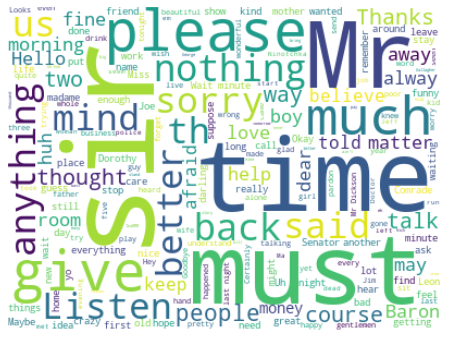

90er:


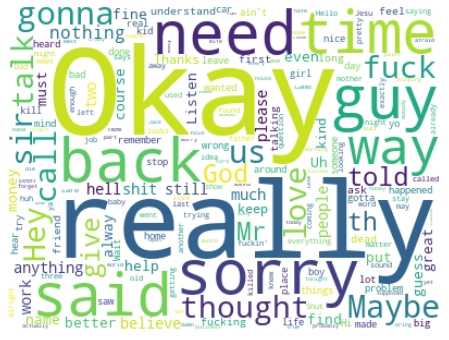

In [43]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stop_word_list = "a about above after again against all am an and any are aren't as at be because been before being below between both but by can't cannot could couldn't did didn't do does doesn't doing don't down during each few for from further had hadn't has hasn't have haven't having he he'd he'll he's her here here's hers herself him himself his how how's i i'd i'll i'm i've if in into is isn't it it's its itself let's me more most mustn't my myself no nor not of off on once only or other ought our ours	ourselves out over own same shan't she she'd she'll she's should shouldn't so some such than that that's the their theirs them themselves then there there's these they they'd they'll they're they've this those through to too under until up very was wasn't we we'd we'll we're we've were weren't what what's when when's where where's which while who who's whom why why'swith won't would wouldn't you you'd you'll you're you've your yours yourself yourselves"
uninteressant = "Rowan Michael Zimmermann Letty something Paul little say make thing know think well want right got going Oh go see will come one man thank look mean good sure now tell take yeah ye yes let never" 
liste_der_unerwuenschten_woerter = uninteressant.split() + stop_word_list.split()
STOPWORDS.update(liste_der_unerwuenschten_woerter)

# Generate a word for male lines
wordcloud = WordCloud(background_color="white",width=400, height=300).generate(character_lines_metadata[filter_century20_30].Line.to_string())
print('30er:')
plt.figure(figsize=(9,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

wordcloud = WordCloud(background_color="white",width=400, height=300).generate(character_lines_metadata[filter_century20_90].Line.to_string())
print('90er:')
plt.figure(figsize=(9,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Sentiment Analysis

In [47]:
from textblob import TextBlob


pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

line_30 = character_lines_metadata[filter_century20_30]

line_30['polarity'] = character_lines_metadata[filter_century20_30].Line.apply(str).apply(pol)
line_30['subjectivity'] = character_lines_metadata[filter_century20_30].Line.apply(str).apply(sub)
line_30

<ipython-input-47-299e02bc9e1a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  line_30['polarity'] = character_lines_metadata[filter_century20_30].Line.apply(str).apply(pol)
<ipython-input-47-299e02bc9e1a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  line_30['subjectivity'] = character_lines_metadata[filter_century20_30].Line.apply(str).apply(sub)


,Character,Title,Gender,LineID,Movie,Name,Line,Year,Rating,Genres,polarity,subjectivity
7825,u284,american madness,?,L34790,m18,BILL,Yes - sure�,1932,7.4,['drama'],0.000000,0.000000
7826,u284,american madness,?,L34788,m18,BILL,Why not?,1932,7.4,['drama'],0.000000,0.000000
7827,u284,american madness,?,L34786,m18,BILL,What's the idea of turning her down? It sound...,1932,7.4,['drama'],0.172222,0.394444
7828,u284,american madness,?,L34760,m18,BILL,"But listen, Tom, I�",1932,7.4,['drama'],0.000000,0.000000
7829,u284,american madness,?,L34758,m18,BILL,"Tom, I never had trouble getting credit from ...",1932,7.4,['drama'],-0.112500,0.162500
...,...,...,...,...,...,...,...,...,...,...,...,...
302793,u8964,the wizard of oz,?,L660365,m610,WIZARD,"Uh - now, please don't be angry with me. I'll...",1939,8.3,"['adventure', 'family', 'fantasy', 'musical']",-0.166667,1.000000
302794,u8964,the wizard of oz,?,L660435,m610,WIZARD,-- Ruined my exit!,1939,8.3,"['adventure', 'family', 'fantasy', 'musical']",0.000000,0.000000
302795,u8964,the wizard of oz,?,L660433,m610,WIZARD,This is a highly irregular procedure! This is...,1939,8.3,"['adventure', 'family', 'fantasy', 'musical']",0.475000,0.720000
302796,u8964,the wizard of oz,?,L660398,m610,WIZARD,Yes -- ....,1939,8.3,"['adventure', 'family', 'fantasy', 'musical']",0.000000,0.000000


In [59]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

line_90 = character_lines_metadata[filter_century20_90]

line_90['polarity'] = line_90.Line.apply(str).apply(pol)
line_90['subjectivity'] = line_90.Line.apply(str).apply(sub)
line_90

<ipython-input-59-433dcf3b2dd7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  line_90['polarity'] = line_90.Line.apply(str).apply(pol)
<ipython-input-59-433dcf3b2dd7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  line_90['subjectivity'] = line_90.Line.apply(str).apply(sub)


,Character,Title,Gender,LineID,Movie,Name,Line,Year,Rating,Genres,polarity,subjectivity
0,u0,10 things i hate about you,f,L1045,m0,BIANCA,They do not!,1999,6.9,"['comedy', 'romance']",0.000000,0.000000
1,u0,10 things i hate about you,f,L985,m0,BIANCA,I hope so.,1999,6.9,"['comedy', 'romance']",0.000000,0.000000
2,u0,10 things i hate about you,f,L925,m0,BIANCA,Let's go.,1999,6.9,"['comedy', 'romance']",0.000000,0.000000
3,u0,10 things i hate about you,f,L872,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,1999,6.9,"['comedy', 'romance']",0.500000,0.500000
4,u0,10 things i hate about you,f,L870,m0,BIANCA,I'm kidding. You know how sometimes you just...,1999,6.9,"['comedy', 'romance']",0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
303105,u8974,the world is not enough,m,L663064,m611,ZUKOVSKY,C-class.,1999,6.3,"['action', 'adventure', 'thriller']",0.000000,0.000000
303106,u8974,the world is not enough,m,L663062,m611,ZUKOVSKY,"In the good old days, the KGB had three or fo...",1999,6.3,"['action', 'adventure', 'thriller']",0.400000,0.400000
303107,u8974,the world is not enough,m,L663059,m611,ZUKOVSKY,Former KGB surveillance post. The Dye Factory...,1999,6.3,"['action', 'adventure', 'thriller']",0.350000,0.300000
303108,u8974,the world is not enough,m,L663037,m611,ZUKOVSKY,No! Bond!,1999,6.3,"['action', 'adventure', 'thriller']",0.000000,0.000000


0.06323731618446199
0.038547768961214895


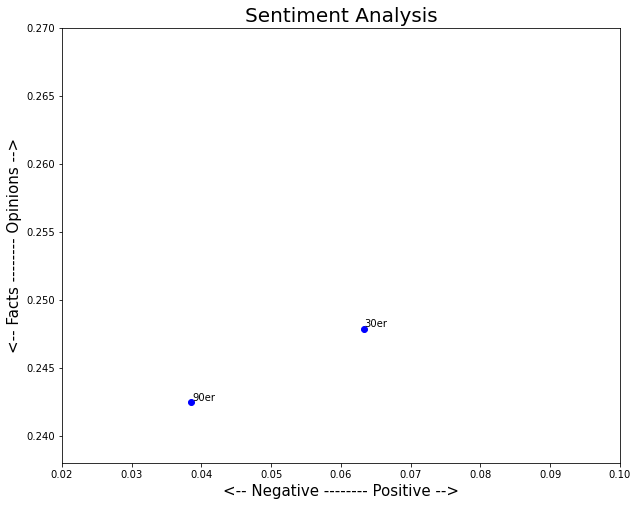

In [74]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

p_l30 = line_30.polarity.mean()
print(p_l30)
p_l90 = line_90.polarity.mean()
print(p_l90)
s_l30 = line_30.subjectivity.mean()
s_l90 = line_90.subjectivity.mean()

plt.scatter(p_l30, s_l30, color='blue')
plt.text(p_l30+.0001, s_l30+.0001, '30er', fontsize=10)
#plt.xlim(.043, .045) 


plt.scatter(p_l90, s_l90, color='blue')
plt.text(p_l90+.0001, s_l90+.0001, '90er', fontsize=10)
plt.xlim(.02, .1) 
plt.ylim(.238, .27) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()